<img style="float: right;" width="120" src="http://neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<img style="float: left; margin-top: 0" width="80" src="http://neueda.conygre.com/pydata/images/client-logo.png">
<br><br><br>

# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Efficient Frontier

Investors have different appetites for risk

Some favour safer returns at the expense of less change of exceptional returns.

Portfolio theory is that some risk can be mitigated by mixing ecurities together

Can allow investors to earn higher rate of return whilst reducing risk

## Load in some Data

1 years worth

Approx 252 days

In [5]:
# get AAPL and GLD Close prices from yahoo into df starting 2019-01-01

Symbols          AAPL         GLD
Date                             
2019-01-02  39.480000  121.330002
2019-01-03  35.547501  122.430000
2019-01-04  37.064999  121.440002
2019-01-07  36.982498  121.860001
2019-01-08  37.687500  121.529999

In [6]:
#  take the last 253 rows (252 days approximates trading days in a year) ~(5/7)*365
df = df[-253:]

# create an empty dataframe that contains the Log(e) of the difference for each values
df_vol = pd.DataFrame()
for stock in stocks:
    if stock not in df_vol:
        df_vol[stock] = np.log(df[stock]).diff()

## Annualize variances

Multiply daily variance by 252

In [8]:
# for the 'AAPL' and 'GLD' columns in df_vol, get the variance (df.var()) and multiply by 252

# print the two resulting numbers

0.17581732584276372
0.03386575126988745


## Construct a Portfolio

Weights - 90% apple, 10% gold

Expected Returns -  (Apple 14%), Gold(7%)

In [5]:
w_aapl =  .9
w_gld = 1 - w_aapl
exp_aapl = .14
exp_gld = .07

In [6]:
exp = w_aapl * exp_aapl + w_gld * exp_gld
exp

0.13300000000000003

### Anualize the covariance
<a href="https://www.investopedia.com/terms/c/covariance.asp">Covariance</a>

In [22]:
cov = np.cov(df_vol['AAPL'].iloc[1:], df_vol['GLD'].iloc[1:])[0,1] * 252
cov

0.008417240582927739

### Calculate std of Portfolio

<a href="https://www.investopedia.com/ask/answers/042815/what-difference-between-expected-return-and-standard-deviation-portfolio.asp">Standard Deviation of Portfolio</a>
Based on weights (90% & 10%)

$ \large std_{port} = \sqrt{var_{aapl}.(weight_{aapl})^2 + var_{gld}.(weight_{gld})^2 + 2. cov.weight_{aapl}.weight_{gld} }$

In [8]:
port_std = np.sqrt(var_aapl * w_aapl **2 + var_gld * w_gld ** 2 + 2 * cov * w_aapl * w_gld)
port_std

0.37982337309631764

## Analyse Results

With 90% Apple & 10% gold

- Expect return is 13.3%
- Expected volatility is 36.7%

Might consider this too high a risk

## Repeat

But with difference weights

e.g. weights of 0%, 5%, 10%, 155, ... 100%

In [9]:
df_effic = pd.DataFrame({'weight_aapl':np.zeros(21), 'exp_ret': np.zeros(21), 'std': np.zeros(21)})

w_aapl = 0.0
for weight in range(21):
    df_effic['weight_aapl'][weight] = w_aapl
    df_effic['exp_ret'][weight] = w_aapl * exp_aapl + (1-w_aapl) * exp_gld
    df_effic['std'][weight] = np.sqrt(var_aapl * w_aapl ** 2 + var_gld * (1-w_aapl) ** 2 + cov * w_aapl * (1 - w_aapl))
    w_aapl = w_aapl + .05

df_effic

weight_aapl  exp_ret       std
0          0.00   0.0700  0.184026
1          0.05   0.0735  0.177209
2          0.10   0.0770  0.173052
3          0.15   0.0805  0.171747
4          0.20   0.0840  0.173360
5          0.25   0.0875  0.177810
6          0.30   0.0910  0.184893
7          0.35   0.0945  0.194321
8          0.40   0.0980  0.205773
9          0.45   0.1015  0.218931
10         0.50   0.1050  0.233506
11         0.55   0.1085  0.249251
12         0.60   0.1120  0.265957
13         0.65   0.1155  0.283454
14         0.70   0.1190  0.301606
15         0.75   0.1225  0.320300
16         0.80   0.1260  0.339447
17         0.85   0.1295  0.358975
18         0.90   0.1330  0.378825
19         0.95   0.1365  0.398948
20         1.00   0.1400  0.419306

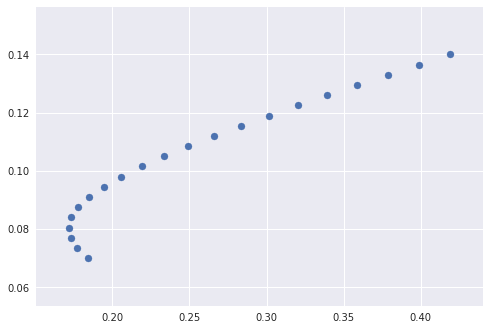

In [10]:
with plt.style.context('seaborn'):
    plt.scatter(df_effic['std'],df_effic['exp_ret'])